### Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Import data

In [2]:
dataset = keras.datasets.fashion_mnist
((train_images, train_id), (test_images, test_id)) = dataset.load_data()

### Visualize data images

In [3]:
# Name clothes id
id_classification = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

C:\Users\paulo\AppData\Local\Temp\ipykernel_18532\1873367447.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)


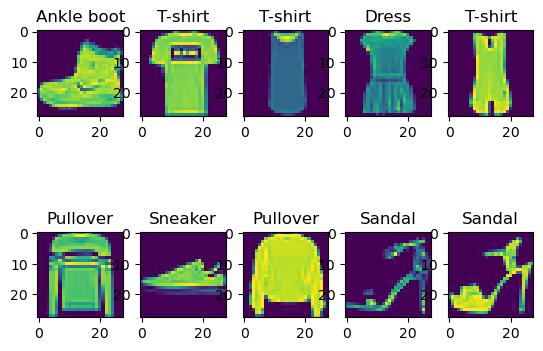

In [4]:
plt.imshow(train_images[0])
plt.title(train_id[0])

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_images[i])
    plt.title(id_classification[train_id[i]])

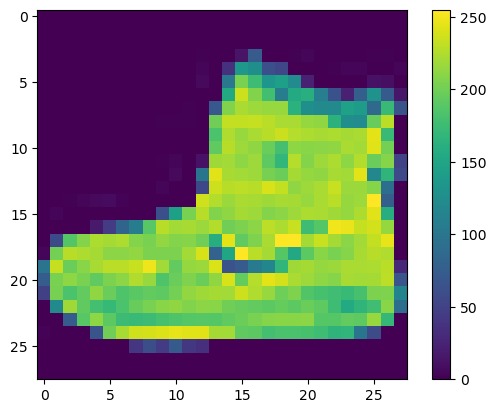

In [5]:
# color bar

plt.imshow(train_images[0])
plt.colorbar()

## Model

### Normalization

In [6]:
# Normalization

train_images = train_images/float(255)

### Model build

In [7]:
model = keras.Sequential(
    [
        keras.layers.Flatten(
            input_shape=(28,28)
        ),
        keras.layers.Dense(
            units=256, activation='relu'
        ),
        keras.layers.Dropout(
            0.1
        ),
        keras.layers.Dense(
            units=10, activation='softmax'
        )
        
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



history = model.fit(train_images, train_id, epochs=3, validation_split=0.2)

c:\Users\paulo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3


c:\Users\paulo\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7704 - loss: 0.6538 - val_accuracy: 0.8455 - val_loss: 0.4256
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8547 - loss: 0.3942 - val_accuracy: 0.8674 - val_loss: 0.3640
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8727 - loss: 0.3505 - val_accuracy: 0.8733 - val_loss: 0.3472


### Accuracy and Loss plots

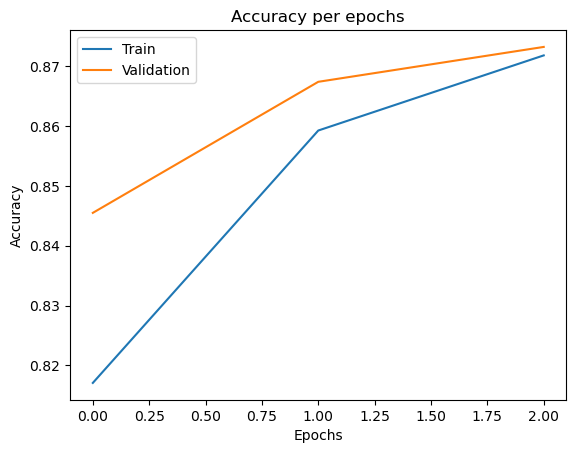

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy per epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

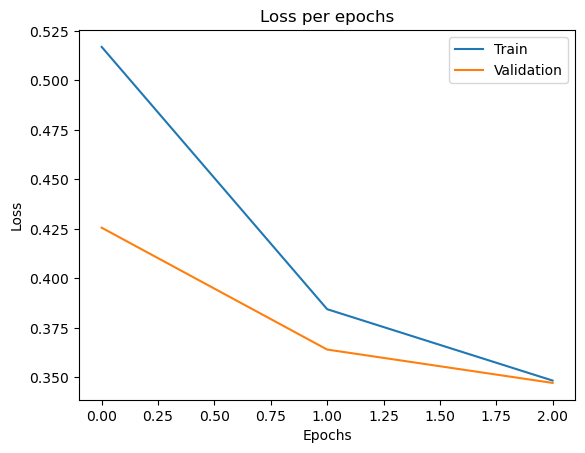

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss per epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

### Save and test model

In [10]:
# Save model

model.save('model.keras')
saved_model = load_model('model.keras')

#### Test saved model

In [11]:
# Test

test_saved_model = saved_model.predict(test_images)
print(f'Image: {(test_id[1])}')
print(f'Predicted image: {np.argmax(test_saved_model[1])}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Image: 2
Predicted image: 2


### Evaluate

In [12]:
# Evaluate

loss, accuracy = model.evaluate(test_images, test_id)
print(f'Accuracy: {round(accuracy*100,2)}%')
print(f'Loss: {loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8478 - loss: 59.4045
Accuracy: 84.17%
Loss: 64.3995132446289
